In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz, DecisionTreeClassifier, plot_tree
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from tabulate import tabulate
from ann_visualizer.visualize import ann_viz;
from graphviz import Digraph
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
import spektral
from sklearn import metrics

In [2]:
### Import Data
df = pd.read_csv('/Users/Lane/OneDrive/ADS502/clean_combine.csv')

In [3]:
df.count()

Unnamed: 0                    10587
report_school_year            10587
aggregation_index             10587
aggregation_type              10587
county_code                   10587
county_name                   10587
membership_code               10587
membership_key                10587
membership_desc               10587
subgroup_code                 10587
subgroup_name                 10587
enroll_cnt                    10587
grad_cnt                      10587
grad_pct                      10587
local_cnt                     10587
local_pct                     10587
reg_cnt                       10587
reg_pct                       10587
reg_adv_cnt                   10587
reg_adv_pct                   10587
non_diploma_credential_cnt    10587
non_diploma_credential_pct    10587
still_enr_cnt                 10587
still_enr_pct                 10587
ged_cnt                       10587
ged_pct                       10587
dropout_cnt                   10587
dropout_pct                 

In [4]:
df[['membership_code']].value_counts()

membership_code
8                  1926
9                  1925
11                 1925
6                  1921
10                 1446
18                 1444
dtype: int64

In [5]:
df['report_school_year'].value_counts()

2019-20    2892
2018-19    2890
2020-21    2880
2017-18    1925
Name: report_school_year, dtype: int64

In [6]:
df['county_name'].value_counts()

ALBANY       176
MONROE       176
NEW YORK     176
BRONX        176
KINGS        176
            ... 
OTSEGO       158
YATES        157
LEWIS        156
SCHOHARIE    151
HAMILTON     107
Name: county_name, Length: 62, dtype: int64

In [7]:
df['subgroup_name'].value_counts()

All Students                                       1364
Female                                             1364
Male                                               1364
White                                              1364
Black                                               736
Hispanic                                            734
Asian/Pacific Islander                              722
American Indian/Alaska Native                       614
Hispanic or Latino                                  613
Black or African American                           610
American Indian or Alaska Native                    498
Asian or Native Hawaiian/Other Pacific Islander     362
Asian or Pacific Islander                           242
Name: subgroup_name, dtype: int64

In [8]:
df[['subgroup_code','subgroup_name']].value_counts()

subgroup_code  subgroup_name                                  
1              All Students                                       1364
2              Female                                             1364
3              Male                                               1364
8              White                                              1364
5              Black                                               736
6              Hispanic                                            734
7              Asian/Pacific Islander                              722
4              American Indian/Alaska Native                       614
6              Hispanic or Latino                                  613
5              Black or African American                           610
4              American Indian or Alaska Native                    498
7              Asian or Native Hawaiian/Other Pacific Islander     362
               Asian or Pacific Islander                           242
dtype: int64

In [9]:
df['county_name'].value_counts()

ALBANY       176
MONROE       176
NEW YORK     176
BRONX        176
KINGS        176
            ... 
OTSEGO       158
YATES        157
LEWIS        156
SCHOHARIE    151
HAMILTON     107
Name: county_name, Length: 62, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10587 entries, 0 to 10586
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  10587 non-null  int64  
 1   report_school_year          10587 non-null  object 
 2   aggregation_index           10587 non-null  int64  
 3   aggregation_type            10587 non-null  object 
 4   county_code                 10587 non-null  float64
 5   county_name                 10587 non-null  object 
 6   membership_code             10587 non-null  int64  
 7   membership_key              10587 non-null  int64  
 8   membership_desc             10587 non-null  object 
 9   subgroup_code               10587 non-null  int64  
 10  subgroup_name               10587 non-null  object 
 11  enroll_cnt                  10587 non-null  object 
 12  grad_cnt                    10587 non-null  object 
 13  grad_pct                    105

In [11]:
df.describe()

,Unnamed: 0,aggregation_index,county_code,membership_code,membership_key,subgroup_code
count,10587.000000,10587.0,10587.000000,10587.000000,10587.000000,10587.000000
mean,5293.000000,2.0,34.473222,10.001511,149.669406,4.499669
std,3056.347984,0.0,20.526319,3.567200,15.485124,2.319321
min,0.000000,2.0,1.000000,6.000000,124.000000,1.000000
25%,2646.500000,2.0,16.000000,8.000000,139.000000,2.000000
50%,5293.000000,2.0,34.000000,9.000000,152.000000,5.000000
75%,7939.500000,2.0,53.000000,11.000000,166.000000,7.000000
max,10586.000000,2.0,68.000000,18.000000,174.000000,8.000000


In [12]:
df['subgroup_name']


0                                           All Students
1                                                 Female
2                                                   Male
3                       American Indian or Alaska Native
4        Asian or Native Hawaiian/Other Pacific Islander
                              ...                       
10582                                               Male
10583                      American Indian/Alaska Native
10584                                              Black
10585                                           Hispanic
10586                                              White
Name: subgroup_name, Length: 10587, dtype: object

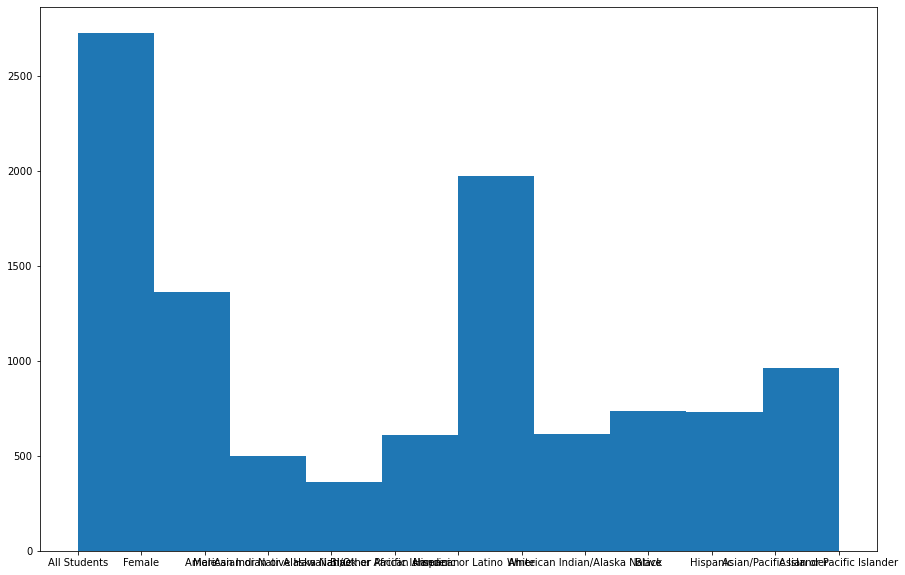

In [13]:
plt.figure(figsize=(15,10))
plt.hist(df['subgroup_name'])
plt.show()

## Data Cleaning

In [14]:
df.count().isnull()
df2 = df.replace('-', np.nan)

### Replace '-' with np nulls then remove nulls

In [15]:
print(df2.isnull().sum())



df3 = df2.dropna()

Unnamed: 0                       0
report_school_year               0
aggregation_index                0
aggregation_type                 0
county_code                      0
county_name                      0
membership_code                  0
membership_key                   0
membership_desc                  0
subgroup_code                    0
subgroup_name                    0
enroll_cnt                     592
grad_cnt                      1358
grad_pct                      1358
local_cnt                     1358
local_pct                     1358
reg_cnt                       1358
reg_pct                       1358
reg_adv_cnt                   1358
reg_adv_pct                   1358
non_diploma_credential_cnt    1358
non_diploma_credential_pct    1358
still_enr_cnt                 1358
still_enr_pct                 1358
ged_cnt                       1358
ged_pct                       1358
dropout_cnt                   1358
dropout_pct                   1358
dtype: int64


In [16]:
df3['grad_pct']

0         90%
1         93%
2         86%
3        100%
4         92%
         ... 
10579     84%
10580     82%
10581     83%
10582     80%
10586     83%
Name: grad_pct, Length: 9229, dtype: object

In [17]:
print(df3.columns.tolist())

['Unnamed: 0', 'report_school_year', 'aggregation_index', 'aggregation_type', 'county_code', 'county_name', 'membership_code', 'membership_key', 'membership_desc', 'subgroup_code', 'subgroup_name', 'enroll_cnt', 'grad_cnt', 'grad_pct', 'local_cnt', 'local_pct', 'reg_cnt', 'reg_pct', 'reg_adv_cnt', 'reg_adv_pct', 'non_diploma_credential_cnt', 'non_diploma_credential_pct', 'still_enr_cnt', 'still_enr_pct', 'ged_cnt', 'ged_pct', 'dropout_cnt', 'dropout_pct']


In [18]:
df3['grad_pct_d'] = df3['grad_pct'].str.replace('%', '').astype('float')

df3['reg_pct_d'] = df3['reg_pct'].str.replace('%', '').astype('float')

df3['local_pct_d'] = df3['local_pct'].str.replace('%', '').astype('float')

df3['reg_adv_pct_d'] = df3['reg_adv_pct'].str.replace('%', '').astype('float')

df3['non_diploma_credential_pct_d'] = df3['non_diploma_credential_pct'].str.replace('%', '').astype('float')

df3['still_enr_pct_d'] = df3['still_enr_pct'].str.replace('%', '').astype('float')

df3['ged_pct_d'] = df3['ged_pct'].str.replace('%', '').astype('float')

df3['dropout_pct_d'] = df3['dropout_pct'].str.replace('%', '').astype('float')




C:\Users\Lane\AppData\Local\Temp/ipykernel_16708/510767794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['grad_pct_d'] = df3['grad_pct'].str.replace('%', '').astype('float')
C:\Users\Lane\AppData\Local\Temp/ipykernel_16708/510767794.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['reg_pct_d'] = df3['reg_pct'].str.replace('%', '').astype('float')
C:\Users\Lane\AppData\Local\Temp/ipykernel_16708/510767794.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

### Remove '%' from the percentage columns, make 

In [19]:
df3[['grad_pct_d','dropout_pct_d','ged_pct_d','still_enr_pct_d','non_diploma_credential_pct_d',
     'reg_adv_pct_d','reg_pct_d','local_pct_d']].head(10)


,grad_pct_d,dropout_pct_d,ged_pct_d,still_enr_pct_d,non_diploma_credential_pct_d,reg_adv_pct_d,reg_pct_d,local_pct_d
0,90.0,7.0,0.0,2.0,1.0,44.0,40.0,5.0
1,93.0,5.0,0.0,1.0,1.0,47.0,41.0,5.0
2,86.0,9.0,0.0,2.0,1.0,41.0,40.0,5.0
3,100.0,0.0,0.0,0.0,0.0,60.0,20.0,20.0
4,92.0,7.0,0.0,1.0,0.0,64.0,26.0,2.0
5,78.0,16.0,1.0,4.0,1.0,13.0,56.0,9.0
6,85.0,12.0,1.0,2.0,1.0,23.0,55.0,7.0
7,94.0,4.0,0.0,1.0,1.0,55.0,35.0,4.0
8,90.0,6.0,0.0,3.0,1.0,48.0,38.0,3.0
9,92.0,5.0,0.0,2.0,1.0,54.0,35.0,3.0


### Create Covid + Pre-Covid columns

In [20]:
pan = {'2020-21' : 'COVID','2019-20' : 'Pre-COVID', '2018-19': 'Pre-COVID', '2017-18' : 'Pre-COVID'}
df3['pandemic'] = df3['report_school_year'].map(pan)

C:\Users\Lane\AppData\Local\Temp/ipykernel_16708/1609926352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['pandemic'] = df3['report_school_year'].map(pan)


### Create numerical binaries for Covid + Pre-covid for models later. 

In [21]:
pan_num = {'COVID' : 1, 'Pre-COVID' : 0}
df3['pan_num'] = df3['pandemic'].map(pan_num)

C:\Users\Lane\AppData\Local\Temp/ipykernel_16708/2932832706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['pan_num'] = df3['pandemic'].map(pan_num)


In [22]:
df3[['pandemic','pan_num']]

,pandemic,pan_num
0,COVID,1
1,COVID,1
2,COVID,1
3,COVID,1
4,COVID,1
...,...,...
10579,Pre-COVID,0
10580,Pre-COVID,0
10581,Pre-COVID,0
10582,Pre-COVID,0


In [23]:
df3['subgroup_name'] = df3['subgroup_name'].str.replace('/', ' or ')
df3['subgroup_name'] = df3['subgroup_name'].str.replace(' or Native Hawaiian', '')
df3['subgroup_name'] = df3['subgroup_name'].str.replace(' Other', '')
df3['subgroup_name'] = df3['subgroup_name'].str.replace(' or Latino', '')
df3['subgroup_name'] = df3['subgroup_name'].str.replace(' or African American', '')



C:\Users\Lane\AppData\Local\Temp/ipykernel_16708/2842209803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['subgroup_name'] = df3['subgroup_name'].str.replace('/', ' or ')
C:\Users\Lane\AppData\Local\Temp/ipykernel_16708/2842209803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['subgroup_name'] = df3['subgroup_name'].str.replace(' or Native Hawaiian', '')
C:\Users\Lane\AppData\Local\Temp/ipykernel_16708/2842209803.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [24]:
df3['subgroup_name'].value_counts()

All Students                        1364
Female                              1364
Male                                1364
White                               1342
Hispanic                            1203
Black                               1175
Asian or Pacific Islander            879
American Indian or Alaska Native     538
Name: subgroup_name, dtype: int64

In [25]:
## Categorical Grad Percentage
df3['grad_pct_grade'] = pd.cut(df3['grad_pct_d'],bins=[0,50 , 60, 70 , 80 , 90,100], labels=[0,1,2,3,4,5])

C:\Users\Lane\AppData\Local\Temp/ipykernel_16708/2713879746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['grad_pct_grade'] = pd.cut(df3['grad_pct_d'],bins=[0,50 , 60, 70 , 80 , 90,100], labels=[0,1,2,3,4,5])


In [26]:
## Converting object type to integer where necessary.
df3[['ged_cnt','non_diploma_credential_cnt','grad_cnt','enroll_cnt', 
     'local_cnt','reg_cnt']] = df3[['ged_cnt','non_diploma_credential_cnt',
                                    'grad_cnt','enroll_cnt', 'local_cnt','reg_cnt']].astype('int')

C:\Users\Lane\AppData\Local\Temp/ipykernel_16708/960106786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[['ged_cnt','non_diploma_credential_cnt','grad_cnt','enroll_cnt',


In [27]:
### total ged, diploma, or other credential % to total enrollment count

ged_dip_cred_cnt = df3['ged_cnt']+df3['non_diploma_credential_cnt']+df3['grad_cnt']
df3['ged_diploma_cred_pct'] = ged_dip_cred_cnt / df3['enroll_cnt'] *100

C:\Users\Lane\AppData\Local\Temp/ipykernel_16708/4217769644.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['ged_diploma_cred_pct'] = ged_dip_cred_cnt / df3['enroll_cnt'] *100


In [28]:
df3['ged_diploma_cred_pct'] = df3['ged_diploma_cred_pct'].round(2)

C:\Users\Lane\AppData\Local\Temp/ipykernel_16708/1684678380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['ged_diploma_cred_pct'] = df3['ged_diploma_cred_pct'].round(2)


In [29]:
df3[['enroll_cnt','ged_diploma_cred_pct']]

,enroll_cnt,ged_diploma_cred_pct
0,3069,90.81
1,1536,93.62
2,1533,88.00
3,5,100.00
4,266,92.11
...,...,...
10579,165,85.45
10580,213,83.57
10581,96,86.46
10582,117,81.20


In [30]:
df3.count()

Unnamed: 0                      9229
report_school_year              9229
aggregation_index               9229
aggregation_type                9229
county_code                     9229
county_name                     9229
membership_code                 9229
membership_key                  9229
membership_desc                 9229
subgroup_code                   9229
subgroup_name                   9229
enroll_cnt                      9229
grad_cnt                        9229
grad_pct                        9229
local_cnt                       9229
local_pct                       9229
reg_cnt                         9229
reg_pct                         9229
reg_adv_cnt                     9229
reg_adv_pct                     9229
non_diploma_credential_cnt      9229
non_diploma_credential_pct      9229
still_enr_cnt                   9229
still_enr_pct                   9229
ged_cnt                         9229
ged_pct                         9229
dropout_cnt                     9229
d

In [31]:
df3.to_csv(r'C:\Users\Lane\OneDrive\ADS502\student_grad_experiment.csv', index=False)

# Data Exploration

In [32]:
Cov = df3['grad_pct_d'].loc[df3['pandemic'] == 'COVID']
PCov = df3['grad_pct_d'].loc[df3['pandemic'] == 'Pre-COVID']

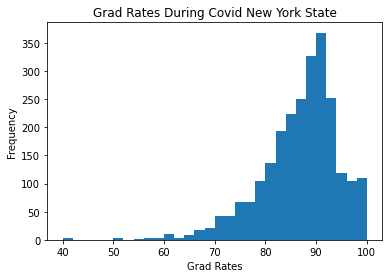

In [33]:
plt.hist(Cov, bins=30)
plt.title('Grad Rates During Covid New York State')
plt.xlabel('Grad Rates')
plt.ylabel('Frequency')
plt.show()

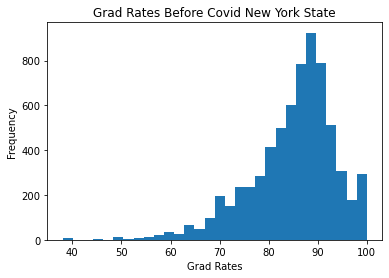

In [34]:
plt.hist(PCov, bins=30)
plt.title('Grad Rates Before Covid New York State')
plt.xlabel('Grad Rates')
plt.ylabel('Frequency')
plt.show()

In [35]:
Covd = df3['dropout_pct_d'].loc[df3['pandemic'] == 'COVID']
PCovd = df3['dropout_pct_d'].loc[df3['pandemic'] == 'Pre-COVID']

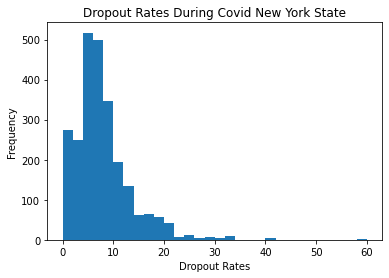

In [36]:
plt.hist(Covd, bins=30)
plt.title('Dropout Rates During Covid New York State')
plt.xlabel('Dropout Rates')
plt.ylabel('Frequency')
plt.show()

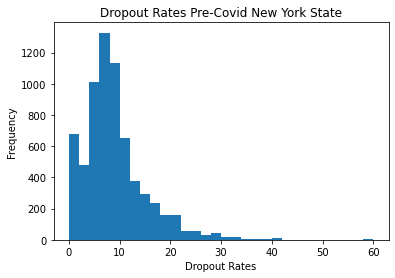

In [37]:
plt.hist(PCovd, bins=30)
plt.title('Dropout Rates Pre-Covid New York State')
plt.xlabel('Dropout Rates')
plt.ylabel('Frequency')
plt.show()

In [38]:
Cove = df3['enroll_cnt'].loc[df3['pandemic'] == 'COVID']
PCove = df3['enroll_cnt'].loc[df3['pandemic'] == 'Pre-COVID']

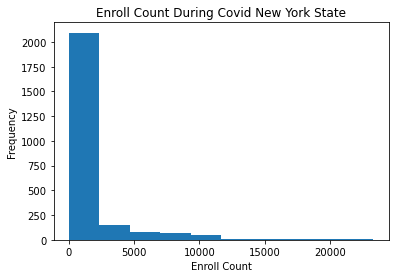

In [39]:
plt.hist(Cove)
plt.title('Enroll Count During Covid New York State')
plt.xlabel('Enroll Count')
plt.ylabel('Frequency')
plt.show()

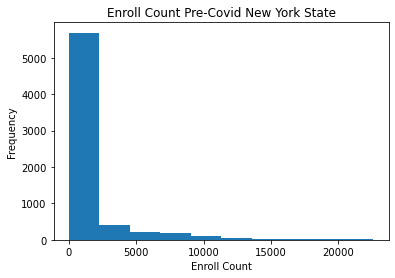

In [40]:
plt.hist(PCove)
plt.title('Enroll Count Pre-Covid New York State')
plt.xlabel('Enroll Count')
plt.ylabel('Frequency')
plt.show()

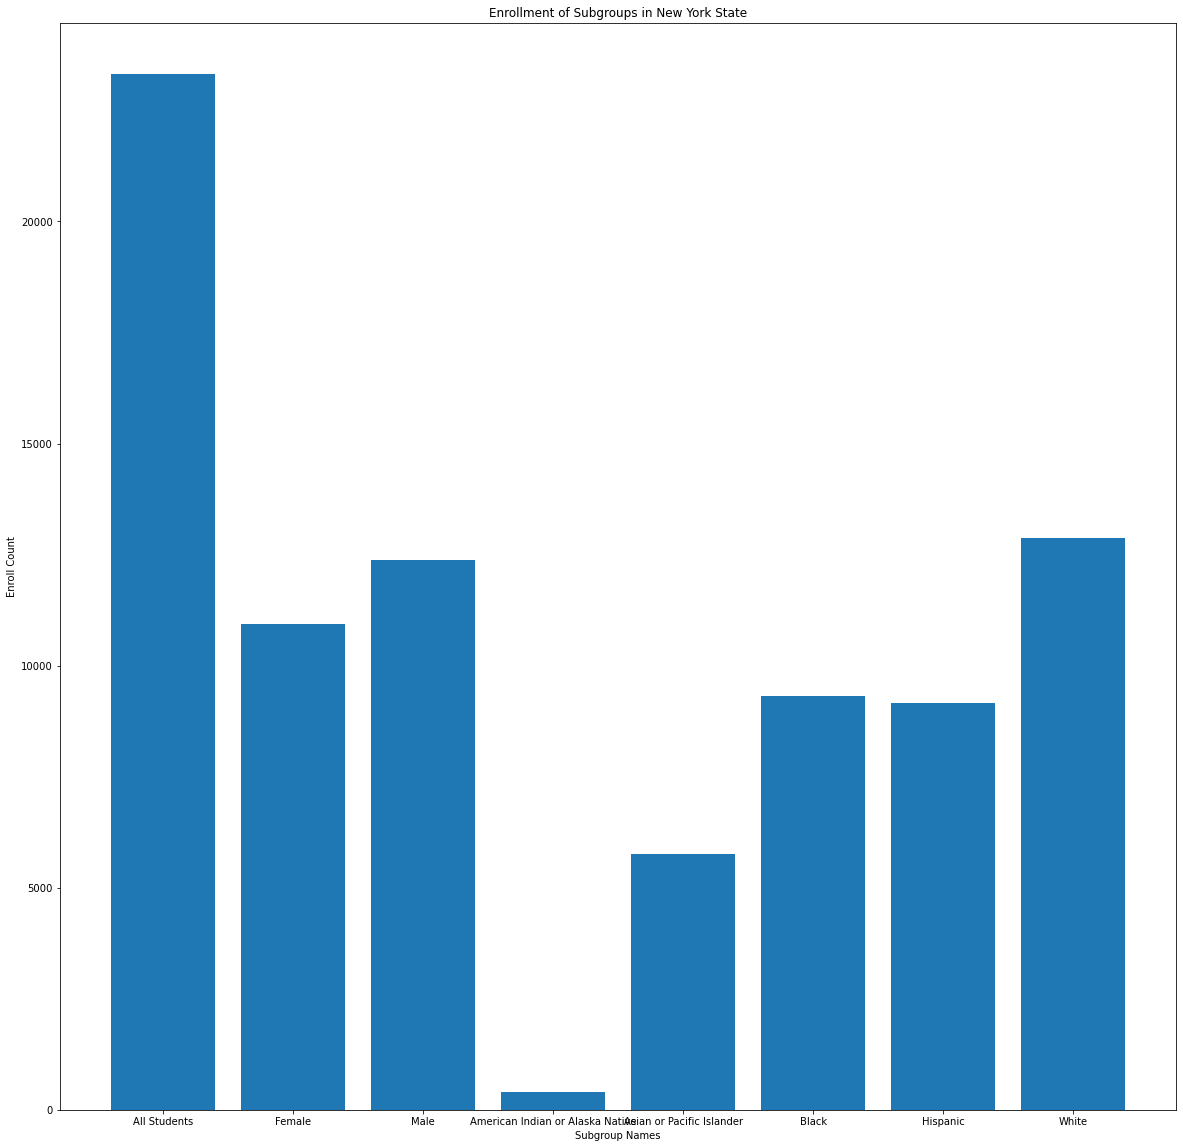

In [41]:
plt.figure(figsize=(20,20))
plt.title('Enrollment of Subgroups in New York State')
plt.bar(x=df3.subgroup_name, height=df3.enroll_cnt)
plt.xlabel('Subgroup Names')
plt.ylabel('Enroll Count')
plt.show()

In [42]:
crosstab = pd.crosstab(df3['subgroup_name'], df3['pandemic'])

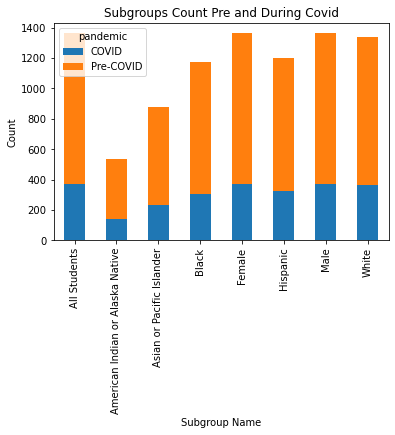

In [43]:
crosstab.plot(kind = 'bar', stacked  = True)
plt.title('Subgroups Count Pre and During Covid')
plt.xlabel('Subgroup Name')
plt.ylabel('Count')
plt.show()

In [44]:
crosstab_norm = crosstab.div(crosstab.sum(1), axis = 0)

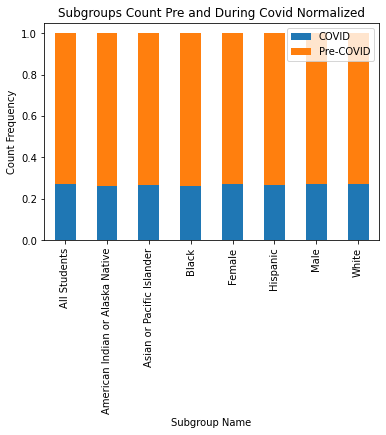

In [45]:
crosstab_norm.plot(kind = 'bar', stacked  = True)
plt.title('Subgroups Count Pre and During Covid Normalized')
plt.xlabel('Subgroup Name')
plt.ylabel('Count Frequency')
plt.legend(loc = 'upper right')
plt.show()

In [46]:
df3.corr()

,Unnamed: 0,aggregation_index,county_code,membership_code,membership_key,subgroup_code,enroll_cnt,grad_cnt,local_cnt,reg_cnt,...,grad_pct_d,reg_pct_d,local_pct_d,reg_adv_pct_d,non_diploma_credential_pct_d,still_enr_pct_d,ged_pct_d,dropout_pct_d,pan_num,ged_diploma_cred_pct
Unnamed: 0,1.000000,NaN,0.253698,-0.040675,-0.781767,0.001736,0.011559,0.008026,0.084493,0.014012,...,-0.058509,-0.003599,0.124001,-0.069371,0.009812,0.031962,-0.034747,0.060398,-0.769979,-0.066139
aggregation_index,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
county_code,0.253698,NaN,1.000000,-0.000158,-0.001755,-0.005616,0.048948,0.056400,0.032402,0.057588,...,0.113318,0.050098,-0.018401,0.032897,-0.099490,-0.031114,-0.084425,-0.083939,0.000065,0.083686
membership_code,-0.040675,NaN,-0.000158,1.000000,0.297173,0.000281,-0.000116,0.001451,0.015501,0.001024,...,0.022574,-0.002535,0.028677,0.004569,0.000504,-0.044104,-0.003801,0.005518,0.056911,0.023702
membership_key,-0.781767,NaN,-0.001755,0.297173,1.000000,-0.002607,0.002607,0.009549,-0.062373,0.002474,...,0.110176,0.007972,-0.101067,0.086742,-0.046916,-0.086482,0.012697,-0.070980,0.761699,0.108822
subgroup_code,0.001736,NaN,-0.005616,0.000281,-0.002607,1.000000,-0.192089,-0.188623,-0.193951,-0.195325,...,-0.004420,-0.107250,-0.058370,0.089365,-0.044734,0.021221,-0.021910,0.001332,-0.003628,-0.016350
enroll_cnt,0.011559,NaN,0.048948,-0.000116,0.002607,-0.192089,1.000000,0.995393,0.842029,0.968195,...,0.002176,0.014721,-0.117591,0.029066,-0.108105,0.127888,0.009847,-0.078464,0.002904,-0.018226
grad_cnt,0.008026,NaN,0.056400,0.001451,0.009549,-0.188623,0.995393,1.000000,0.819379,0.951783,...,0.036195,-0.001297,-0.126324,0.060800,-0.111397,0.099306,-0.001414,-0.098510,0.007921,0.015336
local_cnt,0.084493,NaN,0.032402,0.015501,-0.062373,-0.193951,0.842029,0.819379,1.000000,0.877481,...,-0.071721,0.105678,0.034778,-0.121125,-0.045515,0.083029,0.042658,0.038564,-0.077593,-0.079097
reg_cnt,0.014012,NaN,0.057588,0.001024,0.002474,-0.195325,0.968195,0.951783,0.877481,1.000000,...,-0.034802,0.115923,-0.088757,-0.068165,-0.093461,0.138605,0.029193,-0.044064,0.001933,-0.051536


In [47]:
crosstab_grad_pct = pd.crosstab(df3['grad_pct_grade'], df3['pandemic'])

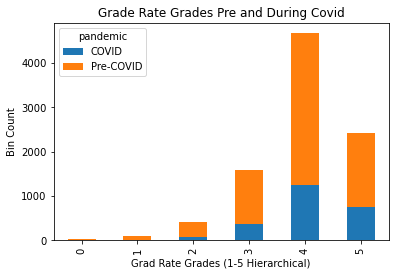

In [48]:
crosstab_grad_pct.plot(kind = 'bar', stacked  = True)
plt.title('Grade Rate Grades Pre and During Covid')
plt.xlabel('Grad Rate Grades (1-5 Hierarchical)')
plt.ylabel('Bin Count')
plt.show()

In [49]:
crosstab_norm_grad = crosstab_grad_pct.div(crosstab_grad_pct.sum(1), axis = 0)

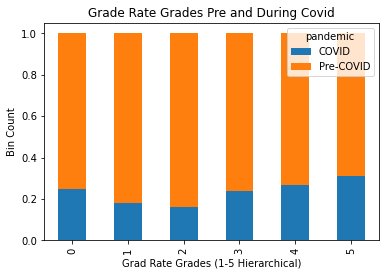

In [50]:
crosstab_norm_grad.plot(kind = 'bar', stacked  = True)
plt.title('Grade Rate Grades Pre and During Covid')
plt.xlabel('Grad Rate Grades (1-5 Hierarchical)')
plt.ylabel('Bin Count')
plt.show()

In [51]:
round(crosstab_grad_pct.div(crosstab_grad_pct.sum(0), axis = 1)*100, 1)

pandemic,COVID,Pre-COVID
grad_pct_grade,,
0,0.3,0.4
1,0.7,1.2
2,2.7,5.2
3,15.3,17.8
4,50.7,50.6
5,30.2,24.8


In [52]:
crosstab_grad_sub = pd.crosstab(df3['subgroup_name'], df3['grad_pct_grade'])

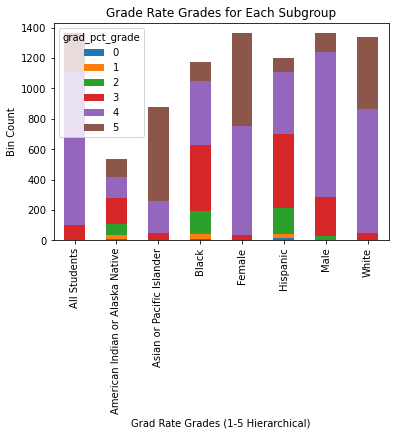

In [53]:
crosstab_grad_sub.plot(kind = 'bar', stacked  = True)
plt.title('Grade Rate Grades for Each Subgroup')
plt.xlabel('Grad Rate Grades (1-5 Hierarchical)')
plt.ylabel('Bin Count')
plt.show()

In [54]:
crosstab_norm_gradsub = crosstab_grad_sub.div(crosstab_grad_sub.sum(1), axis = 0)

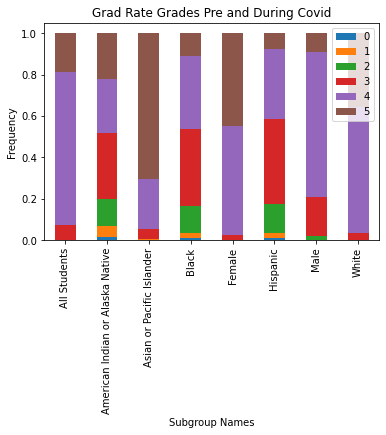

In [55]:
crosstab_norm_gradsub.plot(kind = 'bar', stacked  = True)
plt.title('Grad Rate Grades Pre and During Covid')
plt.xlabel('Subgroup Names')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

In [56]:
Covid = df3[['grad_pct_grade','subgroup_name']].loc[df3['pandemic'] == 'COVID']
pre_covid = df3[['grad_pct_grade','subgroup_name']].loc[df3['pandemic'] == 'Pre-COVID']

In [57]:
cross_cov = pd.crosstab(Covid['subgroup_name'], Covid['grad_pct_grade'])
cross_pc = pd.crosstab(pre_covid['subgroup_name'], pre_covid['grad_pct_grade'])

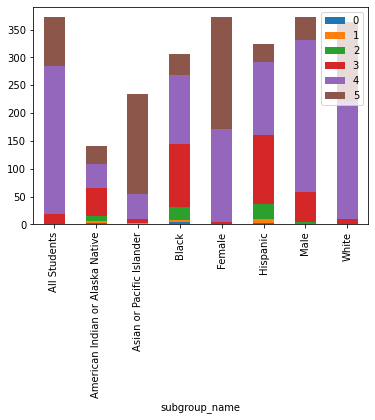

In [58]:
cross_cov.plot(kind = 'bar', stacked= True)

plt.legend(loc = 'upper right')
plt.show()

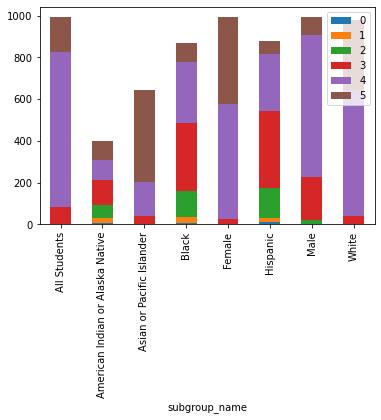

In [59]:
cross_pc.plot(kind = 'bar', stacked= True)

plt.legend(loc = 'upper right')
plt.show()

In [60]:
norm_cov = cross_cov.div(cross_cov.sum(1), axis = 0)
norm_pc = cross_pc.div(cross_pc.sum(1), axis = 0)

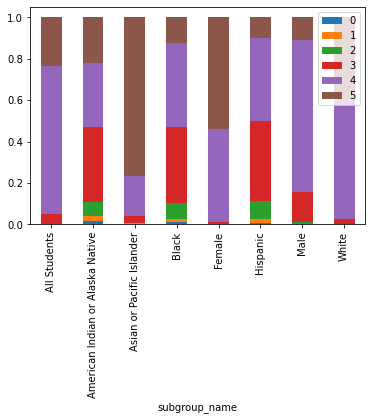

In [61]:
norm_cov.plot(kind = 'bar', stacked= True)

plt.legend(loc = 'upper right')
plt.show()

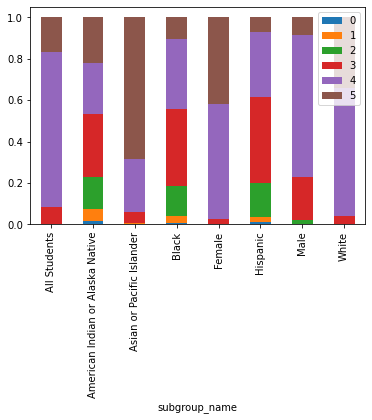

In [62]:
norm_pc.plot(kind = 'bar', stacked= True)

plt.legend(loc = 'upper right')
plt.show()

In [63]:
round(cross_cov.div(cross_cov.sum(0), axis = 1)*100, 1)

grad_pct_grade,0,1,2,3,4,5
subgroup_name,,,,,,
All Students,0.0,0.0,0.0,5.0,21.0,11.7
American Indian or Alaska Native,25.0,23.5,13.4,13.4,3.4,4.1
Asian or Pacific Islander,0.0,11.8,0.0,2.1,3.6,23.8
Black,50.0,23.5,35.8,29.4,9.8,5.1
Female,0.0,0.0,0.0,1.3,13.3,26.6
Hispanic,25.0,41.2,41.8,32.5,10.4,4.3
Male,0.0,0.0,7.5,14.2,21.7,5.3
White,0.0,0.0,1.5,2.1,16.8,19.0


In [64]:
round(cross_pc.div(cross_pc.sum(0), axis = 1)*100, 1)

grad_pct_grade,0,1,2,3,4,5
subgroup_name,,,,,,
All Students,0.0,0.0,0.8,6.7,21.7,9.9
American Indian or Alaska Native,25.0,30.8,17.6,10.1,2.8,5.3
Asian or Pacific Islander,4.2,2.6,0.0,2.9,4.9,26.3
Black,29.2,37.2,35.7,27.0,8.6,5.4
Female,0.0,0.0,0.0,2.3,16.1,24.7
Hispanic,41.7,28.2,40.2,30.6,8.1,3.7
Male,0.0,1.3,5.7,17.2,20.0,5.0
White,0.0,0.0,0.0,3.2,17.8,19.8


### Neural Network Creation

In [65]:
train, test = train_test_split(df3, test_size = 0.3, random_state = 0)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [66]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6460 entries, 0 to 6459
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Unnamed: 0                    6460 non-null   int64   
 1   report_school_year            6460 non-null   object  
 2   aggregation_index             6460 non-null   int64   
 3   aggregation_type              6460 non-null   object  
 4   county_code                   6460 non-null   float64 
 5   county_name                   6460 non-null   object  
 6   membership_code               6460 non-null   int64   
 7   membership_key                6460 non-null   int64   
 8   membership_desc               6460 non-null   object  
 9   subgroup_code                 6460 non-null   int64   
 10  subgroup_name                 6460 non-null   object  
 11  enroll_cnt                    6460 non-null   int32   
 12  grad_cnt                      6460 non-null   in

### Neural Network Predictor Preparation

In [67]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(train[['local_pct_d','reg_pct_d','reg_adv_pct_d','non_diploma_credential_pct_d','still_enr_pct_d',
                                  'ged_pct_d','dropout_pct_d']])
scaled_test = scaler.fit_transform(test[['local_pct_d','reg_pct_d','reg_adv_pct_d','non_diploma_credential_pct_d','still_enr_pct_d',
                                  'ged_pct_d','dropout_pct_d']])


sub_dum = pd.get_dummies(train['subgroup_name'])
sub_dum_test = pd.get_dummies(test['subgroup_name'])

sub_dum.columns = ['All_Students', 'American_Indian_Alaska_Native', 'Asian_Pacific_Islander', 'Black','Female','Hispanic','Male',
                  'White']
sub_dum_test.columns = ['All_Students', 'American_Indian_Alaska_Native', 'Asian_Pacific_Islander', 'Black','Female','Hispanic','Male',
                  'White']

In [68]:
scaled = pd.DataFrame(scaled)
scaled_test = pd.DataFrame(scaled_test)

scaled.columns = ['local_pct_mm','reg_pct_mm','reg_adv_pct_mm','non_diploma_credential_pct_mm','still_enr_pct_mm',
                                  'ged_pct_mm','dropout_pct_mm']
scaled_test.columns = ['local_pct_mm','reg_pct_mm','reg_adv_pct_mm','non_diploma_credential_pct_mm','still_enr_pct_mm',
                                  'ged_pct_mm','dropout_pct_mm']

X = pd.concat([sub_dum,scaled], axis=1)
y = train[['pan_num']]

X_test = pd.concat([sub_dum_test, scaled_test], axis=1)
y_test = test[['pan_num']]

X_test.head()

,All_Students,American_Indian_Alaska_Native,Asian_Pacific_Islander,Black,Female,Hispanic,Male,White,local_pct_mm,reg_pct_mm,reg_adv_pct_mm,non_diploma_credential_pct_mm,still_enr_pct_mm,ged_pct_mm,dropout_pct_mm
0,0,1,0,0,0,0,0,0,0.000000,0.224719,0.60,0.00,0.000000,0.000000,0.333333
1,0,0,0,0,0,1,0,0,0.068182,0.719101,0.17,0.00,0.166667,0.066667,0.083333
2,0,0,0,0,0,0,1,0,0.113636,0.539326,0.36,0.15,0.016667,0.000000,0.100000
3,0,0,0,0,0,0,1,0,0.090909,0.629213,0.23,0.05,0.100000,0.000000,0.183333
4,0,0,0,0,0,0,0,1,0.113636,0.494382,0.33,0.10,0.100000,0.000000,0.150000


In [69]:
NN = keras.Sequential([
    keras.layers.Dense(32, input_shape=(15,), activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')])

NN.compile(optimizer='adam',
             loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [70]:
X_arr = np.column_stack((X.All_Students.values, X.American_Indian_Alaska_Native.values, X.Asian_Pacific_Islander.values,
                         X.Black.values, X.Female.values, X.Hispanic.values, X.Male.values, X.White.values, 
                         X.local_pct_mm.values,
                         X.reg_pct_mm.values, X.reg_adv_pct_mm.values, X.non_diploma_credential_pct_mm.values,
                         X.still_enr_pct_mm.values, X.ged_pct_mm.values, X.dropout_pct_mm.values))

X_test_arr = np.column_stack((X_test.All_Students.values, X_test.American_Indian_Alaska_Native.values, X_test.Asian_Pacific_Islander.values,
                         X_test.Black.values, X_test.Female.values, X_test.Hispanic.values, X_test.Male.values, X_test.White.values,
                         X_test.local_pct_mm.values,
                         X_test.reg_pct_mm.values, X_test.reg_adv_pct_mm.values, X_test.non_diploma_credential_pct_mm.values,
                         X_test.still_enr_pct_mm.values, X_test.ged_pct_mm.values, X_test.dropout_pct_mm.values))

In [71]:
NN.fit(X_arr, y, batch_size=64, epochs=25)

Epoch 1/25


C:\Users\Lane\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


101/101 [==============================] - 6s 3ms/step - loss: 0.6013 - accuracy: 0.7223
Epoch 2/25
101/101 [==============================] - 0s 2ms/step - loss: 0.5815 - accuracy: 0.7282
Epoch 3/25
101/101 [==============================] - 0s 2ms/step - loss: 0.5781 - accuracy: 0.7282
Epoch 4/25
101/101 [==============================] - 0s 2ms/step - loss: 0.5754 - accuracy: 0.7282
Epoch 5/25
101/101 [==============================] - 0s 2ms/step - loss: 0.5726 - accuracy: 0.7282
Epoch 6/25
101/101 [==============================] - 0s 2ms/step - loss: 0.5703 - accuracy: 0.7282
Epoch 7/25
101/101 [==============================] - 0s 2ms/step - loss: 0.5685 - accuracy: 0.7282
Epoch 8/25
101/101 [==============================] - 0s 2ms/step - loss: 0.5666 - accuracy: 0.7282
Epoch 9/25
101/101 [==============================] - 0s 2ms/step - loss: 0.5647 - accuracy: 0.7280
Epoch 10/25
101/101 [==============================] - 0s 2ms/step - loss: 0.5639 - accuracy: 0.7277
Epoch 11/2

In [72]:
NN.evaluate(X_test_arr, y_test['pan_num'])

87/87 [==============================] - 0s 2ms/step - loss: 0.5486 - accuracy: 0.7414


[0.548557460308075, 0.7414228916168213]

In [73]:
y_pred = NN.predict(X_test)
classes_x = np.argmax(y_pred,axis=1)
y_pred = np.round(y_pred).astype(int)

In [74]:
NN_pred_df = pd.DataFrame(y_pred)
pred = pd.DataFrame(classes_x)

In [75]:
nnpred = pd.crosstab(y_test.pan_num.values, classes_x,
                     rownames=['Actual'],
                     colnames=['Predicted'])
nnpred['Total'] = nnpred.sum(axis=1); nnpred.loc['Total'] = nnpred.sum()
nnpred

Predicted,0,1,Total
Actual,,,
0,2009,32,2041
1,684,44,728
Total,2693,76,2769


In [76]:
TNnn = nnpred[0][0]
FPnn = nnpred[1][0]
FNnn = nnpred[0][1]
TPnn = nnpred[1][1]
TANnn = TNnn + FPnn
TAPnn = FNnn + TPnn
TPNnn = TNnn + FNnn
TPPnn = FPnn + TPnn
GTnn = TNnn + FPnn + FNnn + TPnn


In [77]:
acc_nn = (TNnn+TPnn)/GTnn
err_nn = 1 - acc_nn
sens_nn = TPnn/TAPnn
spec_nn = TNnn/TANnn
prec_nn = TPnn/TPPnn
f1nn = 2*((prec_nn*sens_nn)/(prec_nn+sens_nn))
f2nn = 5*((prec_nn*sens_nn)/((4*prec_nn)+sens_nn))
f3nn = 1.25*((prec_nn*sens_nn)/((.25*prec_nn)+sens_nn))

OVM_nn = (FNnn*3)+(FPnn*1)

PPC_nn = (-OVM_nn)/GTnn

In [78]:
Datann = [['Accuracy', acc_nn],
        ['Error Rate', err_nn],
        ['Sensitivity', sens_nn],
        ['Specificity', spec_nn],
        ['Precision', prec_nn],
        ['f1', f1nn],
        ['f2',f2nn],
        ['f0.5', f3nn]]
col_namesnn = ['Measurement', 'Neural Network Classifier']
nn_evaluation = print(tabulate(Datann, headers = col_namesnn))
nn_evaluation

Measurement      Neural Network Classifier
-------------  ---------------------------
Accuracy                         0.741423
Error Rate                       0.258577
Sensitivity                      0.0604396
Specificity                      0.984321
Precision                        0.578947
f1                               0.109453
f2                               0.0736278
f0.5                             0.213178


In [79]:
NN.get_weights()

[array([[ 3.13452870e-01,  9.92174968e-02, -8.74776989e-02,
          2.36073479e-01, -1.09048024e-01, -5.28358519e-02,
          3.18569124e-01, -2.15987533e-01, -1.35784835e-01,
          2.72229016e-01,  2.34990209e-01,  1.80762604e-01,
         -2.02832222e-01,  1.39571145e-01,  2.76545733e-01,
         -1.93486646e-01, -6.68575764e-02,  1.66410565e-01,
         -1.34647861e-01, -5.02672493e-02, -3.03535044e-01,
         -1.92414522e-01, -3.45932096e-01, -1.42823741e-01,
         -2.88590789e-03,  1.08279899e-01, -2.21115544e-01,
          1.06748147e-02, -2.32815623e-01,  2.54607588e-01,
          1.62245363e-01, -5.08047417e-02],
        [ 3.16277444e-02, -4.46998887e-02, -2.84236044e-01,
         -1.46220595e-01, -2.03418791e-01, -2.86094874e-01,
         -5.91015164e-03, -2.55240947e-01,  8.08822289e-02,
          4.57266271e-02,  3.87415200e-01,  3.23817015e-01,
         -5.68331145e-02, -4.52186078e-01, -5.20781994e-01,
         -2.09014595e-01, -6.68350756e-01, -5.16270846e-

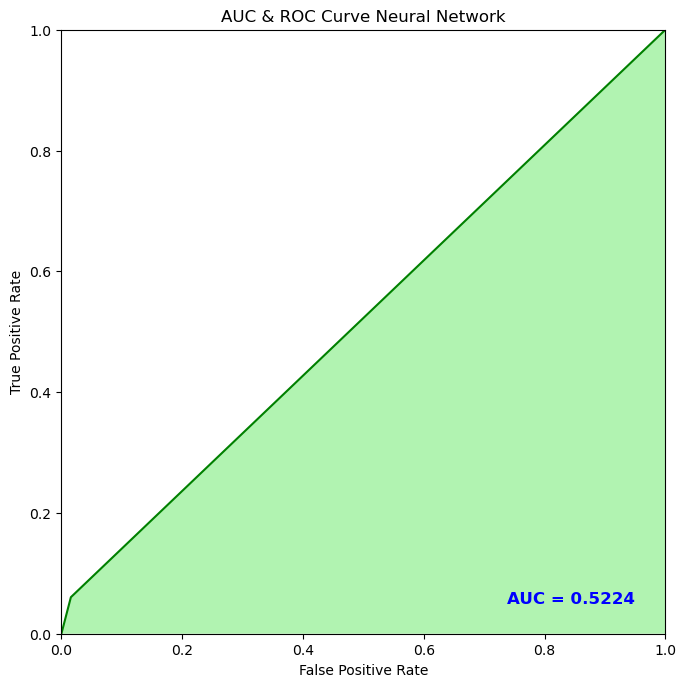

In [80]:
aucnn = metrics.roc_auc_score(y_test, classes_x)

false_positive_ratenn, true_positive_ratenn, thresoldsnn = metrics.roc_curve(y_test, classes_x)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve Neural Network")
plt.plot(false_positive_ratenn, true_positive_ratenn, 'g')
plt.fill_between(false_positive_ratenn, true_positive_ratenn, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % aucnn, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

### Naive Bayes

In [81]:
from sklearn.naive_bayes import MultinomialNB
import statsmodels.tools.tools as stattools

In [82]:
sub_dum = pd.get_dummies(train['subgroup_name'])
sub_dum_test = pd.get_dummies(test['subgroup_name'])

In [83]:
X_nb = pd.concat([sub_dum, train[['local_pct_d','reg_pct_d','reg_adv_pct_d','non_diploma_credential_pct_d',
                                 'still_enr_pct_d','ged_pct_d','dropout_pct_d']]], axis = 1)
y_nb = train['pan_num']

X_nb_test = pd.concat([sub_dum_test, test[['local_pct_d','reg_pct_d','reg_adv_pct_d','non_diploma_credential_pct_d',
                                 'still_enr_pct_d','ged_pct_d','dropout_pct_d']]], axis = 1)
y_nb_test = test['pan_num']
X_nb_test.head(10)


,All Students,American Indian or Alaska Native,Asian or Pacific Islander,Black,Female,Hispanic,Male,White,local_pct_d,reg_pct_d,reg_adv_pct_d,non_diploma_credential_pct_d,still_enr_pct_d,ged_pct_d,dropout_pct_d
0,0,1,0,0,0,0,0,0,0.0,20.0,60.0,0.0,0.0,0.0,20.0
1,0,0,0,0,0,1,0,0,3.0,64.0,17.0,0.0,10.0,1.0,5.0
2,0,0,0,0,0,0,1,0,5.0,48.0,36.0,3.0,1.0,0.0,6.0
3,0,0,0,0,0,0,1,0,4.0,56.0,23.0,1.0,6.0,0.0,11.0
4,0,0,0,0,0,0,0,1,5.0,44.0,33.0,2.0,6.0,0.0,9.0
5,0,0,0,0,0,0,0,1,5.0,43.0,40.0,2.0,0.0,2.0,7.0
6,0,0,0,1,0,0,0,0,8.0,52.0,21.0,0.0,15.0,0.0,4.0
7,1,0,0,0,0,0,0,0,5.0,36.0,50.0,1.0,1.0,0.0,6.0
8,0,0,1,0,0,0,0,0,1.0,18.0,79.0,0.0,1.0,0.0,1.0
9,0,0,0,0,1,0,0,0,7.0,41.0,47.0,1.0,2.0,0.0,3.0


In [84]:
NB = MultinomialNB().fit(X_nb, y_nb)
NB.score(X_nb_test, y_nb_test)

0.6691946551101481

In [85]:
NB.coef_

C:\Users\Lane\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


array([[-6.50489809, -7.44989893, -7.02203288, -6.74708983, -6.57929638,
        -6.60398899, -6.44272084, -6.51628341, -2.96060825, -0.80535099,
        -1.02944555, -4.42028128, -3.14688398, -5.00881905, -2.62524235]])

In [86]:
nb_predictions = NB.predict(X_nb_test)

In [87]:
nbpred = pd.crosstab(y_nb_test, nb_predictions, rownames = ['Actual'], colnames = ['Predicted'])
nbpred['Total'] = nbpred.sum(axis=1); nbpred.loc['Total'] = nbpred.sum()

nbpred

Predicted,0,1,Total
Actual,,,
0,1536,505,2041
1,411,317,728
Total,1947,822,2769


In [88]:
TNnb = nbpred[0][0]
FPnb = nbpred[1][0]
FNnb = nbpred[0][1]
TPnb = nbpred[1][1]
TANnb = TNnb + FPnb
TAPnb = FNnb + TPnb
TPNnb = TNnb + FNnb
TPPnb = FPnb + TPnb
GTnb = TNnb + FPnb + FNnb + TPnb

In [89]:
acc_nb = (TNnb+TPnb)/GTnb
err_nb = 1 - acc_nb
sens_nb = TPnb/TAPnb
spec_nb = TNnb/TANnb
prec_nb = TPnb/TPPnb
f1nb = 2*((prec_nb*sens_nb)/(prec_nb+sens_nb))
f2nb = 5*((prec_nb*sens_nb)/((4*prec_nb)+sens_nb))
f3nb = 1.25*((prec_nb*sens_nb)/((.25*prec_nb)+sens_nb))

OVM_nb = (FNnb*3)+(FPnb*1)

PPC_nb = (-OVM_nb)/GTnb

In [90]:
Datanb = [['Accuracy', acc_nb],
        ['Error Rate', err_nb],
        ['Sensitivity', sens_nb],
        ['Specificity', spec_nb],
        ['Precision', prec_nb],
        ['f1', f1nb],
        ['f2',f2nb],
        ['f0.5', f3nb]]
col_namesnb = ['Measurement', 'Naive Bayes Classifier']
nb_evaluation = print(tabulate(Datanb, headers = col_namesnb))
nb_evaluation

Measurement      Naive Bayes Classifier
-------------  ------------------------
Accuracy                       0.669195
Error Rate                     0.330805
Sensitivity                    0.43544
Specificity                    0.752572
Precision                      0.385645
f1                             0.409032
f2                             0.424478
f0.5                           0.394671


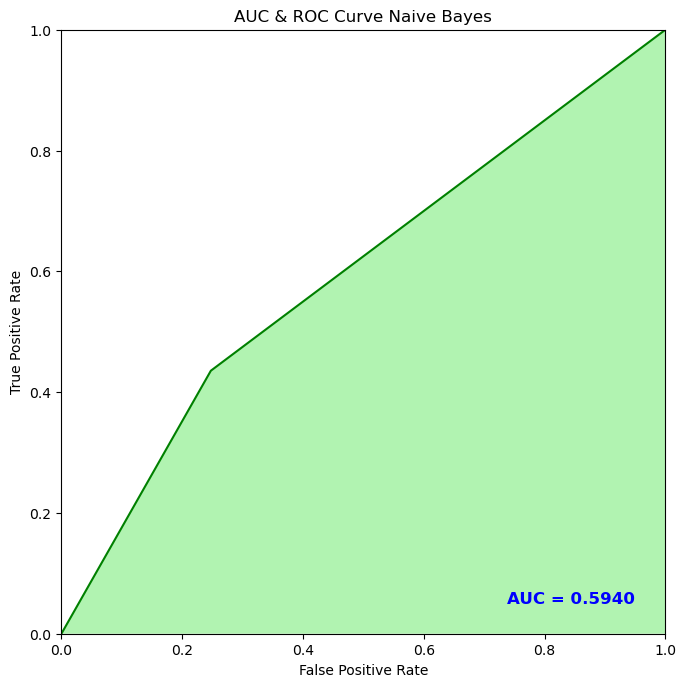

In [91]:
aucnb = metrics.roc_auc_score(y_nb_test, nb_predictions)

false_positive_ratenb, true_positive_ratenb, thresoldsnb = metrics.roc_curve(y_nb_test, nb_predictions)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve Naive Bayes")
plt.plot(false_positive_ratenb, true_positive_ratenb, 'g')
plt.fill_between(false_positive_ratenb, true_positive_ratenb, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % aucnb, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Ensemble Methods

## Bagging Method

In [92]:
from time import time
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [93]:
bag = BaggingClassifier()
start = time()

cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 2, random_state=0)
score = cross_val_score(bag, X_nb, y_nb, scoring='accuracy',cv=cv, n_jobs=1)

In [94]:
score

array([0.80417957, 0.81965944, 0.80882353, 0.80959752, 0.7879257 ,
       0.81424149, 0.8126935 , 0.8126935 , 0.79721362, 0.81037152])

In [95]:
%%time

res = {}
for i in [10,25,50,100,200,400,800]:
    bags = BaggingClassifier(n_estimators=i)
    
    cv = RepeatedStratifiedKFold(n_splits = 3, n_repeats = 2, random_state=0)
    res[f'{i}'] = cross_val_score(bags, X_nb, y_nb, scoring='accuracy', cv=cv, n_jobs=-1)

Wall time: 28 s


In [96]:
res

{'10': array([0.79526462, 0.79331166, 0.78913144, 0.78690808, 0.80074315,
        0.80167209]),
 '25': array([0.7906221 , 0.80631677, 0.80074315, 0.80687094, 0.80538783,
        0.80260102]),
 '50': array([0.80454968, 0.80631677, 0.80027868, 0.80594243, 0.81653507,
        0.80910358]),
 '100': array([0.80687094, 0.80863911, 0.80538783, 0.80872795, 0.81560613,
        0.81235485]),
 '200': array([0.8082637 , 0.80678124, 0.79888528, 0.80872795, 0.8160706 ,
        0.81328379]),
 '400': array([0.81012071, 0.81096145, 0.80213655, 0.81476323, 0.8160706 ,
        0.81328379]),
 '800': array([0.8091922 , 0.80863911, 0.80492336, 0.80965645, 0.81792847,
        0.81560613])}

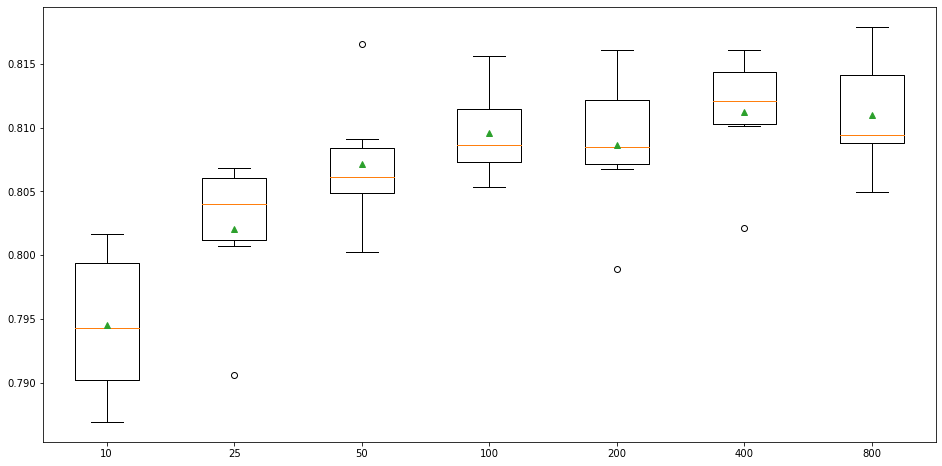

In [97]:
plt.figure(figsize=(16,8))
plt.boxplot(res.values(), labels = res.keys(), showmeans = True)
plt.show()

In [98]:
bag__ = BaggingClassifier(n_estimators=200)
bag_mod = bag__.fit(X_nb, y_nb)

In [99]:
bag_pred = bag_mod.predict(X_nb_test)

In [100]:
bagpred = pd.crosstab(y_nb_test, bag_pred, rownames = ['Actual'], colnames = ['Predicted'])
bagpred['Total'] = bagpred.sum(axis=1); bagpred.loc['Total'] = bagpred.sum()

bagpred

Predicted,0,1,Total
Actual,,,
0,1886,155,2041
1,273,455,728
Total,2159,610,2769


In [101]:
TNbag = bagpred[0][0]
FPbag = bagpred[1][0]
FNbag = bagpred[0][1]
TPbag = bagpred[1][1]
TANbag = TNbag + FPbag
TAPbag = FNbag + TPbag
TPNbag = TNbag + FNbag
TPPbag = FPbag + TPbag
GTbag = TNbag + FPbag + FNbag + TPbag

In [102]:
acc_bag = (TNbag+TPbag)/GTbag
err_bag = 1 - acc_bag
sens_bag = TPbag/TAPbag
spec_bag = TNbag/TANbag
prec_bag = TPbag/TPPbag
f1bag = 2*((prec_bag*sens_bag)/(prec_bag+sens_bag))
f2bag = 5*((prec_bag*sens_bag)/((4*prec_bag)+sens_bag))
f3bag = 1.25*((prec_bag*sens_bag)/((.25*prec_bag)+sens_bag))

OVM_bag = (FNbag*3)+(FPbag*1)

PPC_bag = (-OVM_bag)/GTbag

In [103]:
Databag = [['Accuracy', acc_bag],
        ['Error Rate', err_bag],
        ['Sensitivity', sens_bag],
        ['Specificity', spec_bag],
        ['Precision', prec_bag],
        ['f1', f1bag],
        ['f2',f2bag],
        ['f0.5', f3bag]]
col_names2 = ['Measurement', 'Bagging Ensemble']
bag_evaluation = print(tabulate(Databag, headers = col_names2))
bag_evaluation

Measurement      Bagging Ensemble
-------------  ------------------
Accuracy                 0.845432
Error Rate               0.154568
Sensitivity              0.625
Specificity              0.924057
Precision                0.745902
f1                       0.68012
f2                       0.64594
f0.5                     0.718119


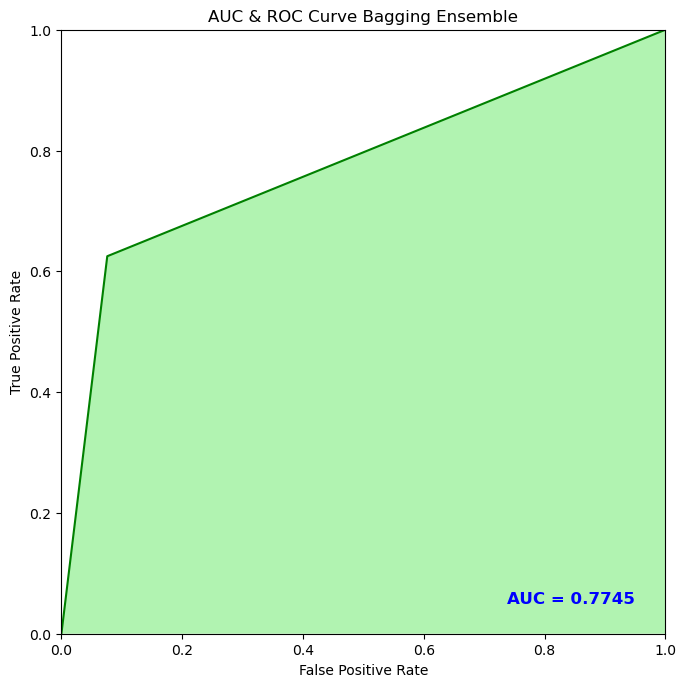

In [104]:
aucbag = metrics.roc_auc_score(y_nb_test, bag_pred)

false_positive_ratebag, true_positive_ratebag, thresoldsbag = metrics.roc_curve(y_nb_test, bag_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve Bagging Ensemble")
plt.plot(false_positive_ratebag, true_positive_ratebag, 'g')
plt.fill_between(false_positive_ratebag, true_positive_ratebag, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % aucbag, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Boosting Method

In [105]:
from xgboost import XGBClassifier

C:\Users\Lane\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [106]:
boost = XGBClassifier(n_estimators = 200)
bo_mod = boost.fit(X_nb, y_nb)

C:\Users\Lane\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Lane\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:12:42] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [107]:
bo_pred = bo_mod.predict(X_nb_test)

In [108]:
bopred = pd.crosstab(y_nb_test, bo_pred, rownames = ['Actual'], colnames = ['Predicted'])
bopred['Total'] = bopred.sum(axis=1); bopred.loc['Total'] = bopred.sum()

bopred

Predicted,0,1,Total
Actual,,,
0,1871,170,2041
1,328,400,728
Total,2199,570,2769


In [109]:
TNbo = bopred[0][0]
FPbo = bopred[1][0]
FNbo = bopred[0][1]
TPbo = bopred[1][1]
TANbo = TNbo + FPbo
TAPbo = FNbo + TPbo
TPNbo = TNbo + FNbo
TPPbo = FPbo + TPbo
GTbo = TNbo + FPbo + FNbo + TPbo

In [110]:
acc_bo = (TNbo+TPbo)/GTbo
err_bo = 1 - acc_bo
sens_bo = TPbo/TAPbo
spec_bo = TNbo/TANbo
prec_bo = TPbo/TPPbo
f1bo = 2*((prec_bo*sens_bo)/(prec_bo+sens_bo))
f2bo = 5*((prec_bo*sens_bo)/((4*prec_bo)+sens_bo))
f3bo = 1.25*((prec_bo*sens_bo)/((.25*prec_bo)+sens_bo))

OVM_bo = (FNbo*3)+(FPbo*1)

PPC_bo = (-OVM_bo)/GTbo

In [111]:
Databo = [['Accuracy', acc_bo],
        ['Error Rate', err_bo],
        ['Sensitivity', sens_bo],
        ['Specificity', spec_bo],
        ['Precision', prec_bo],
        ['f1', f1bo],
        ['f2',f2bo],
        ['f0.5', f3bo]]
col_namesbo = ['Measurement', 'Boosting Ensemble']
bo_evaluation = print(tabulate(Databo, headers = col_namesbo))
bo_evaluation

Measurement      Boosting Ensemble
-------------  -------------------
Accuracy                  0.820152
Error Rate                0.179848
Sensitivity               0.549451
Specificity               0.916707
Precision                 0.701754
f1                        0.616333
f2                        0.574383
f0.5                      0.664894


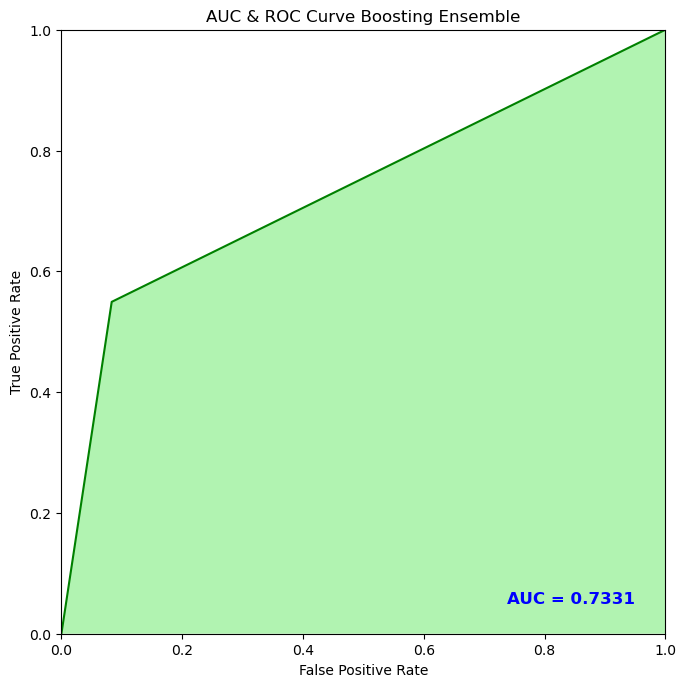

In [112]:
aucbo = metrics.roc_auc_score(y_nb_test, bo_pred)

false_positive_ratebo, true_positive_ratebo, thresoldsbo = metrics.roc_curve(y_nb_test, bo_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve Boosting Ensemble")
plt.plot(false_positive_ratebo, true_positive_ratebo, 'g')
plt.fill_between(false_positive_ratebo, true_positive_ratebo, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % aucbo, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Random Forest Ensemble

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
RFE = RandomForestClassifier(n_estimators=200)

In [115]:
RF_mod = RFE.fit(X_nb, y_nb)

In [116]:
rf_pred = RF_mod.predict(X_nb_test)

In [117]:
rfpred = pd.crosstab(y_nb_test, rf_pred, rownames = ['Actual'], colnames = ['Predicted'])
rfpred['Total'] = rfpred.sum(axis=1); rfpred.loc['Total'] = rfpred.sum()

rfpred

Predicted,0,1,Total
Actual,,,
0,1922,119,2041
1,280,448,728
Total,2202,567,2769


In [118]:
TNrf = rfpred[0][0]
FPrf = rfpred[1][0]
FNrf = rfpred[0][1]
TPrf = rfpred[1][1]
TANrf = TNrf + FPrf
TAPrf = FNrf + TPrf
TPNrf = TNrf + FNrf
TPPrf = FPrf + TPrf
GTrf = TNrf + FPrf + FNrf + TPrf

In [119]:
acc_rf = (TNrf+TPrf)/GTrf
err_rf = 1 - acc_rf
sens_rf = TPrf/TAPrf
spec_rf = TNrf/TANrf
prec_rf = TPrf/TPPrf
f1rf = 2*((prec_rf*sens_rf)/(prec_rf+sens_rf))
f2rf = 5*((prec_rf*sens_rf)/((4*prec_rf)+sens_rf))
f3rf = 1.25*((prec_rf*sens_rf)/((.25*prec_rf)+sens_rf))

OVM_rf = (FNrf*3)+(FPrf*1)

PPC_rf = (-OVM_rf)/GTrf

In [120]:
Datarf = [['Accuracy', acc_rf],
        ['Error Rate', err_rf],
        ['Sensitivity', sens_rf],
        ['Specificity', spec_rf],
        ['Precision', prec_rf],
        ['f1', f1rf],
        ['f2',f2rf],
        ['f0.5', f3rf]]
col_namesrf = ['Measurement', 'Random Forest Gini Ensemble']
rf_evaluation = print(tabulate(Datarf, headers = col_namesrf))
rf_evaluation

Measurement      Random Forest Gini Ensemble
-------------  -----------------------------
Accuracy                            0.855905
Error Rate                          0.144095
Sensitivity                         0.615385
Specificity                         0.941695
Precision                           0.790123
f1                                  0.691892
f2                                  0.643863
f0.5                                0.747664


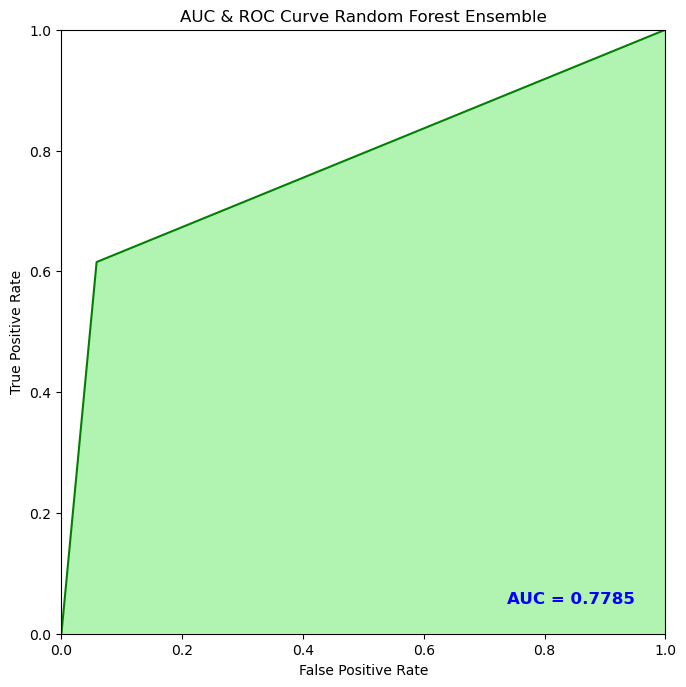

In [121]:
aucrf = metrics.roc_auc_score(y_nb_test, rf_pred)

false_positive_raterf, true_positive_raterf, thresoldsrf = metrics.roc_curve(y_nb_test, rf_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve Random Forest Ensemble")
plt.plot(false_positive_raterf, true_positive_raterf, 'g')
plt.fill_between(false_positive_raterf, true_positive_raterf, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % aucrf, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Entropy Random Forest Ensemble

In [122]:
rfe = RandomForestClassifier(n_estimators=400, criterion = 'entropy' )

In [123]:
rfe.fit(X_nb, y_nb)
rfe_pred = rfe.predict(X_nb_test)

In [124]:
rfepred = pd.crosstab(y_nb_test, rfe_pred, rownames = ['Actual'], colnames = ['Predicted'])
rfepred['Total'] = rfepred.sum(axis=1); rfepred.loc['Total'] = rfepred.sum()

rfepred

Predicted,0,1,Total
Actual,,,
0,1921,120,2041
1,273,455,728
Total,2194,575,2769


In [125]:
TNrfe = rfepred[0][0]
FPrfe = rfepred[1][0]
FNrfe = rfepred[0][1]
TPrfe = rfepred[1][1]
TANrfe = TNrfe + FPrfe
TAPrfe = FNrfe + TPrfe
TPNrfe = TNrfe + FNrfe
TPPrfe = FPrfe + TPrfe
GTrfe = TNrfe + FPrfe + FNrfe + TPrfe

In [126]:
acc_rfe = (TNrfe+TPrfe)/GTrfe
err_rfe = 1 - acc_rfe
sens_rfe = TPrfe/TAPrfe
spec_rfe = TNrfe/TANrfe
prec_rfe = TPrfe/TPPrfe
f1rfe = 2*((prec_rfe*sens_rfe)/(prec_rfe+sens_rfe))
f2rfe = 5*((prec_rfe*sens_rfe)/((4*prec_rfe)+sens_rfe))
f3rfe = 1.25*((prec_rfe*sens_rfe)/((.25*prec_rfe)+sens_rfe))

OVM_rfe = (FNrfe*3)+(FPrfe*1)

PPC_rfe = (-OVM_rfe)/GTrfe

In [127]:
Datarfe = [['Accuracy', acc_rfe],
        ['Error Rate', err_rfe],
        ['Sensitivity', sens_rfe],
        ['Specificity', spec_rfe],
        ['Precision', prec_rfe],
        ['f1', f1rfe],
        ['f2',f2rfe],
        ['f0.5', f3rfe]]
col_namesrfe = ['Measurement', 'Random Forest Entropy Ensemble']
rfe_evaluation = print(tabulate(Datarfe, headers = col_namesrfe))
rfe_evaluation

Measurement      Random Forest Entropy Ensemble
-------------  --------------------------------
Accuracy                               0.858072
Error Rate                             0.141928
Sensitivity                            0.625
Specificity                            0.941205
Precision                              0.791304
f1                                     0.698388
f2                                     0.652423
f0.5                                   0.751321


In [128]:
data = [['Accuracy', acc_nn, acc_rfe, acc_rf, acc_nb, acc_bo,acc_bag],
        ['Error Rate', err_nn, err_rfe, err_rf, err_nb, err_bo, err_bag],
        ['Sensitivity', sens_nn, sens_rfe, sens_rf, sens_nb, sens_bo, sens_bag],
        ['Specificity', spec_nn, spec_rfe, spec_rf, spec_nb, spec_bo, spec_bag],
        ['Precision', prec_nn, prec_rfe, prec_rf, prec_nb, prec_bo, prec_bag],
        ['f1', f1nn, f1rfe, f1rf, f1nb, f1bo, f1bag],
        ['f2',f2nn, f2rfe, f2rf, f2nb, f2bo, f2bag],
        ['f0.5', f3nn, f3rfe, f3rf, f3nb, f3bo, f3bag]] 

col_name = ['Measurement', 'Neural Network', 'Random Forest Entropy', 'Random Forest', 'Naive Bayes', 
            'Boosting', 'Bagging']

evaluation = print(tabulate(data, headers = col_name))
evaluation

Measurement      Neural Network    Random Forest Entropy    Random Forest    Naive Bayes    Boosting    Bagging
-------------  ----------------  -----------------------  ---------------  -------------  ----------  ---------
Accuracy              0.741423                  0.858072         0.855905       0.669195    0.820152   0.845432
Error Rate            0.258577                  0.141928         0.144095       0.330805    0.179848   0.154568
Sensitivity           0.0604396                 0.625            0.615385       0.43544     0.549451   0.625
Specificity           0.984321                  0.941205         0.941695       0.752572    0.916707   0.924057
Precision             0.578947                  0.791304         0.790123       0.385645    0.701754   0.745902
f1                    0.109453                  0.698388         0.691892       0.409032    0.616333   0.68012
f2                    0.0736278                 0.652423         0.643863       0.424478    0.574383   0.645

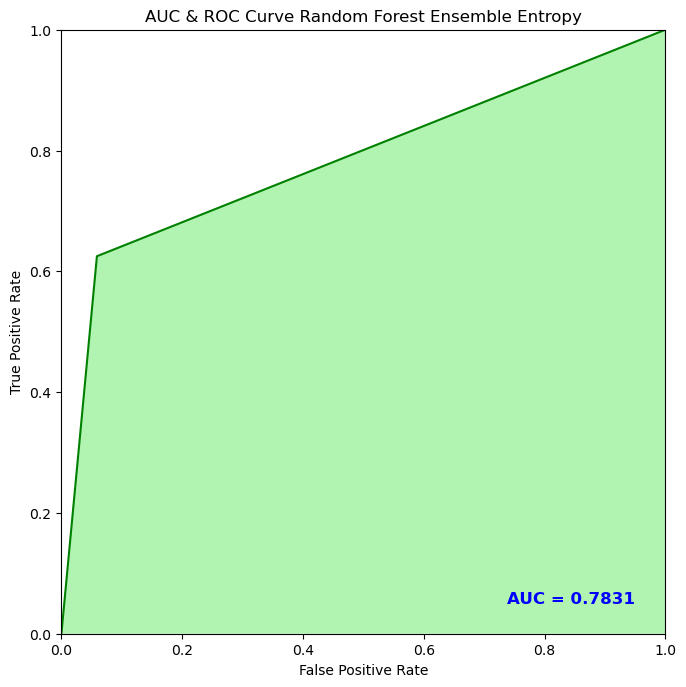

In [129]:
aucrfe = metrics.roc_auc_score(y_nb_test, rfe_pred)

false_positive_raterfe, true_positive_raterfe, thresoldsrfe = metrics.roc_curve(y_nb_test, rfe_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve Random Forest Ensemble Entropy")
plt.plot(false_positive_raterfe, true_positive_raterfe, 'g')
plt.fill_between(false_positive_raterfe, true_positive_raterfe, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % aucrfe, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# CART Model

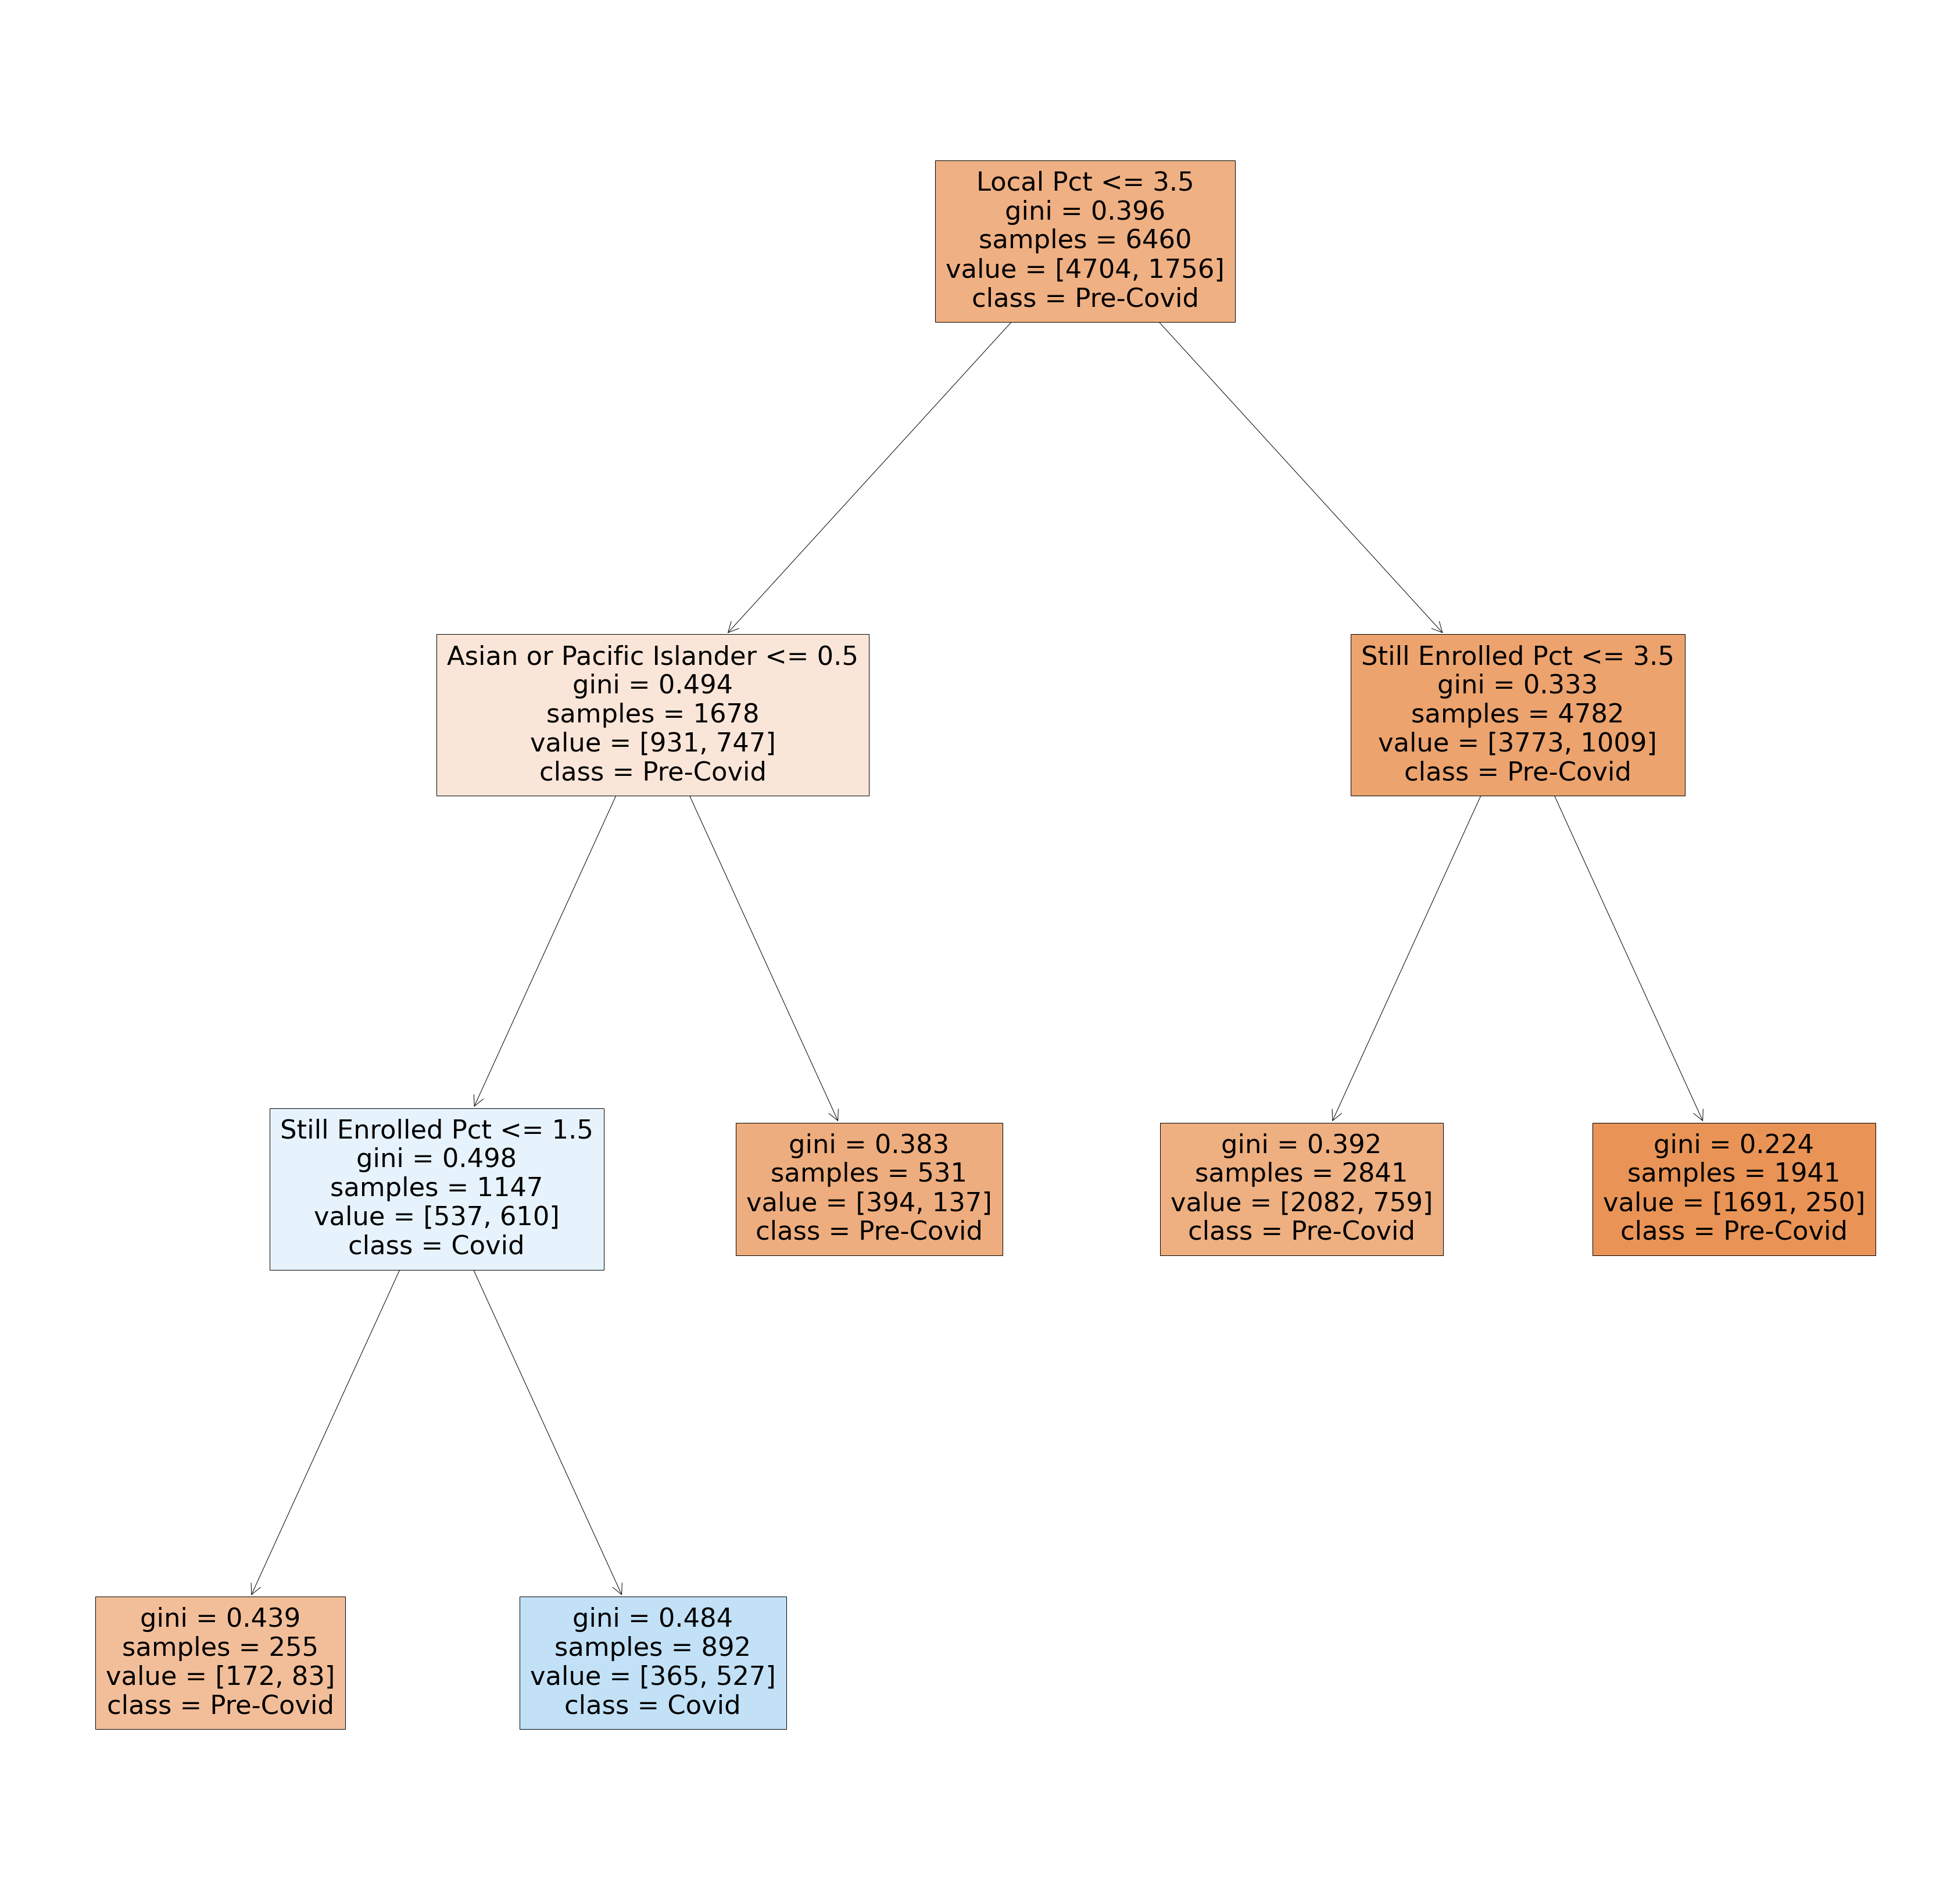

In [130]:

X_names = ["All Students","American Indian or Alaska Native","Asian or Pacific Islander", 'Black', 'Female', 'Hispanic',
          'Male','White','Local Pct','Reg Pct','Advanced Pct','Credential Pct','Still Enrolled Pct','GED Pct','Dropout Pct']
y_names = ['Pre-Covid','Covid']


##cart01 = DecisionTreeClassifier(criterion = "gini", max_leaf_nodes=5).fit(X_nb,y_nb)
##export_graphviz(cart01, out_file = "/Users/Lane/OneDrive/ADS502/cart01.dot",feature_names=X_names, class_names=y_names)


dt = DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = 5)
dt.fit(X_nb, y_nb)
plt.figure(figsize=(60,60))
plot_tree(dt,feature_names = X_names, 
          class_names=y_names, filled = True)
plt.show()

In [131]:
export_graphviz(dt, out_file = "/Users/Lane/OneDrive/ADS502/cart01.dot",feature_names=X_names, class_names=y_names)

In [132]:
import pydot

(graph,) = pydot.graph_from_dot_file('cart01.dot')
graph.write_png('cart01.png')

In [133]:
prediction = dt.predict(X_nb_test)

In [134]:
c5pred = pd.crosstab(y_nb_test, prediction, rownames = ['Actual'], colnames = ['Predicted'])
c5pred['Total'] = c5pred.sum(axis=1); c5pred.loc['Total'] = c5pred.sum()

c5pred

Predicted,0,1,Total
Actual,,,
0,1888,153,2041
1,510,218,728
Total,2398,371,2769


In [135]:
TNc5 = c5pred[0][0]
FPc5 = c5pred[1][0]
FNc5 = c5pred[0][1]
TPc5 = c5pred[1][1]
TANc5 = TNc5 + FPc5
TAPc5 = FNc5 + TPc5
TPNc5 = TNc5 + FNc5
TPPc5 = FPc5 + TPc5
GTc5 = TNc5 + FPc5 + FNc5 + TPc5

In [136]:
acc_c5 = (TNc5+TPc5)/GTc5
err_c5 = 1 - acc_c5
sens_c5 = TPc5/TAPc5
spec_c5 = TNc5/TANc5
prec_c5 = TPc5/TPPc5
f1c5 = 2*((prec_c5*sens_c5)/(prec_c5+sens_c5))
f2c5 = 5*((prec_c5*sens_c5)/((4*prec_c5)+sens_c5))
f3c5 = 1.25*((prec_c5*sens_c5)/((.25*prec_c5)+sens_c5))

OVM_c5 = (FNc5*3)+(FPc5*1)

PPC_c5 = (-OVM_c5)/GTc5

In [137]:
Datac5 = [['Accuracy', acc_c5],
        ['Error Rate', err_c5],
        ['Sensitivity', sens_c5],
        ['Specificity', spec_c5],
        ['Precision', prec_c5],
        ['f1', f1c5],
        ['f2',f2c5],
        ['f0.5', f3c5]]
col_namesc5 = ['Measurement', 'C5.0']
c5_evaluation = print(tabulate(Datac5, headers = col_namesc5))
c5_evaluation

Measurement        C5.0
-------------  --------
Accuracy       0.760563
Error Rate     0.239437
Sensitivity    0.299451
Specificity    0.925037
Precision      0.587601
f1             0.396724
f2             0.332013
f0.5           0.492767


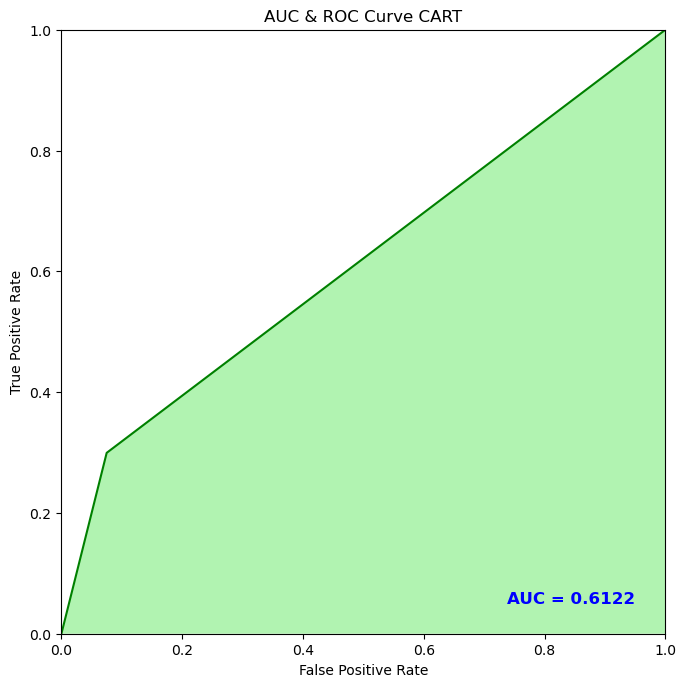

In [138]:
aucca = metrics.roc_auc_score(y_nb_test, prediction)

false_positive_rateca, true_positive_rateca, thresoldsca = metrics.roc_curve(y_nb_test, prediction)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve CART")
plt.plot(false_positive_rateca, true_positive_rateca, 'g')
plt.fill_between(false_positive_rateca, true_positive_rateca, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % aucca, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [139]:
X_nb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6460 entries, 0 to 6459
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   All Students                      6460 non-null   uint8  
 1   American Indian or Alaska Native  6460 non-null   uint8  
 2   Asian or Pacific Islander         6460 non-null   uint8  
 3   Black                             6460 non-null   uint8  
 4   Female                            6460 non-null   uint8  
 5   Hispanic                          6460 non-null   uint8  
 6   Male                              6460 non-null   uint8  
 7   White                             6460 non-null   uint8  
 8   local_pct_d                       6460 non-null   float64
 9   reg_pct_d                         6460 non-null   float64
 10  reg_adv_pct_d                     6460 non-null   float64
 11  non_diploma_credential_pct_d      6460 non-null   float64
 12  still_

In [140]:
data = [['Accuracy', acc_nn, acc_rfe, acc_rf, acc_nb, acc_bo,acc_bag, acc_c5],
        ['Error Rate', err_nn, err_rfe, err_rf, err_nb, err_bo, err_bag, err_c5],
        ['Sensitivity', sens_nn, sens_rfe, sens_rf, sens_nb, sens_bo, sens_bag, sens_c5],
        ['Specificity', spec_nn, spec_rfe, spec_rf, spec_nb, spec_bo, spec_bag, spec_c5],
        ['Precision', prec_nn, prec_rfe, prec_rf, prec_nb, prec_bo, prec_bag, prec_c5],
        ['f1', f1nn, f1rfe, f1rf, f1nb, f1bo, f1bag, f1c5],
        ['f2',f2nn, f2rfe, f2rf, f2nb, f2bo, f2bag, f2c5],
        ['f0.5', f3nn, f3rfe, f3rf, f3nb, f3bo, f3bag, f3c5]] 

col_name = ['Measurement', 'Neural Network', 'Random Forest Entropy', 'Random Forest', 'Naive Bayes', 
            'Boosting', 'Bagging', 'CART']

evaluation = print(tabulate(data, headers = col_name))
evaluation

Measurement      Neural Network    Random Forest Entropy    Random Forest    Naive Bayes    Boosting    Bagging      CART
-------------  ----------------  -----------------------  ---------------  -------------  ----------  ---------  --------
Accuracy              0.741423                  0.858072         0.855905       0.669195    0.820152   0.845432  0.760563
Error Rate            0.258577                  0.141928         0.144095       0.330805    0.179848   0.154568  0.239437
Sensitivity           0.0604396                 0.625            0.615385       0.43544     0.549451   0.625     0.299451
Specificity           0.984321                  0.941205         0.941695       0.752572    0.916707   0.924057  0.925037
Precision             0.578947                  0.791304         0.790123       0.385645    0.701754   0.745902  0.587601
f1                    0.109453                  0.698388         0.691892       0.409032    0.616333   0.68012   0.396724
f2                    0.

# Evaluation

When classifying the students based on graduation rates and subgroup classification to see performance in comparison to one another it is clear that the Random Forest methods perform the best. Both maintain the highest accuracy, among the highest specificity, and, most importantly, is the highest sensitivity. Future models should be constructed using this method due to the performance it offers. After the coming end of the 2022 school year, the graduation class can be added to the model as an additional Covid year, hopefully adding to the performance of the model. 

# Usage

Using this model, future years can be evaluated to identify whether New York State students increased performance continues in future non-Covid years as the new norm after Covid, or returns to usual levels post Covid as they were pre-Covid. 